# Coffe Shop Daily Revenue Regression Model

## Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px; background-color: #512921">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading-the-data">Reading the Data</a></li>
        <li><a href="#exploratory-data-analysis">Exploratory Data Analysis</a></li>
        <li><a href="#visualizing-the-data">Visualizing the Data</a></li>
        <li><a href="#features-target">Split Data into features (X) and target (y)</a></li>
        <li><a href="#preprocessing">Preprocessing</a></li>
        <li><a href="#train-test">Split into Train/Test sets</a></li>
        <li><a href="#training-model">Training Model</a></li>
        <li><a href="#evaluation-model">Evaluation Model</a></li>
        <li><a href="#conclusion">Conclusion</a></li>
    </ol>
</div>

<h2>Loading Data</h2>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<h2 id="understanding-data">Understanding the Data</h2>

This dataset contains daily operational and business metrics for a coffee shop, which are used to predict the shop's Daily Revenue. The features included in the dataset are:

- **Number of Customers Per Day**: The total count of customers who visit the coffee shop each day.
Typical range: 50 to 500 customers.

- **Average Order Value**: The average amount of money spent by each customer during their visit.
Typical range: 2.50 to 10.00 dollars.

- **Operating Hours Per Day**: The number of hours the coffee shop remains open for business each day.
Typical range: 6 to 18 hours.

- **Number of Employees**: The count of employees working on any given day, which can impact service efficiency, customer satisfaction, and overall sales.
Typical range: 2 to 15 employees.

- **Marketing Spend Per Day**: The daily budget allocated for marketing campaigns and promotions.
Typical range: 10 to 500 dollars.

- **Location Foot Traffic (people/hour)**: The estimated number of people passing by the coffee shop per hour, reflecting the shop’s location and its ability to attract potential customers.

- **Daily Revenue ($)**: The target variable representing the total revenue earned by the coffee shop each day. This depends on factors such as customer volume, spending behavior, marketing efforts, staffing, and location.

<h2 id="reading-the-data">Reading the Data</h2>

In [43]:
data = pd.read_csv("data/coffee_shop_revenue.csv")

<p><strong>Note</strong>: You can download the dataset from <a href="#">Github</a> or directly from the <a href="https://www.kaggle.com/datasets/himelsarder/coffee-shop-daily-revenue-prediction-dataset">Kaggle website</a>.</p>

<h2 id="exploratory-data-analysis">Exploratory Data Analysis</h2>

In [44]:
data.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


<h2 id="visualizing-the-data">Visualizing the Data</h2>

We use plots to explore the data, identify patterns, and understand relationships between features before modeling.

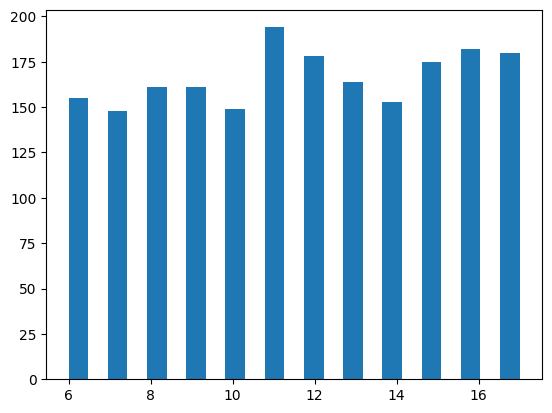

In [46]:
# Operating Hours Per Day

plt.hist(data["Operating_Hours_Per_Day"], bins=23)
plt.show()

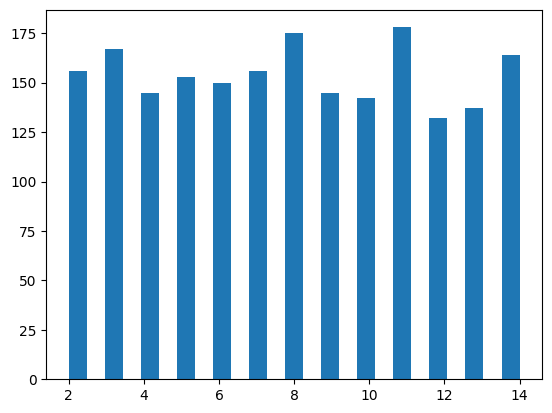

In [47]:
# Number of Employees

plt.hist(data["Number_of_Employees"], bins=25)
plt.show()

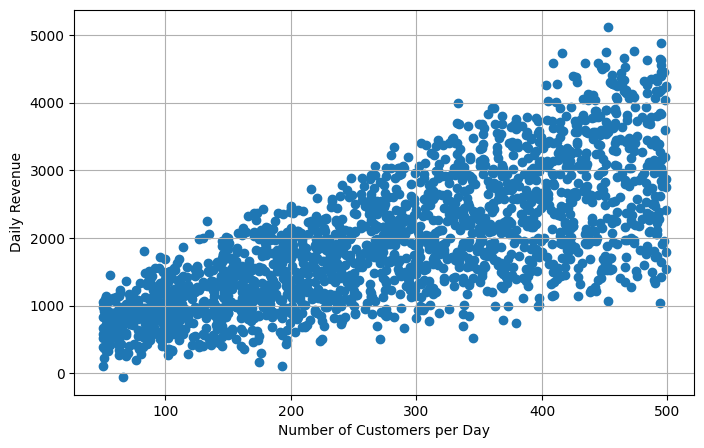

In [48]:
# Number of Customers per day / Daily Revenue

plt.figure(figsize=(8, 5))  # Figure

plt.scatter(data["Number_of_Customers_Per_Day"], data["Daily_Revenue"])  # Scatter plot

plt.xlabel("Number of Customers per Day")
plt.ylabel("Daily Revenue")
plt.grid()
plt.show()

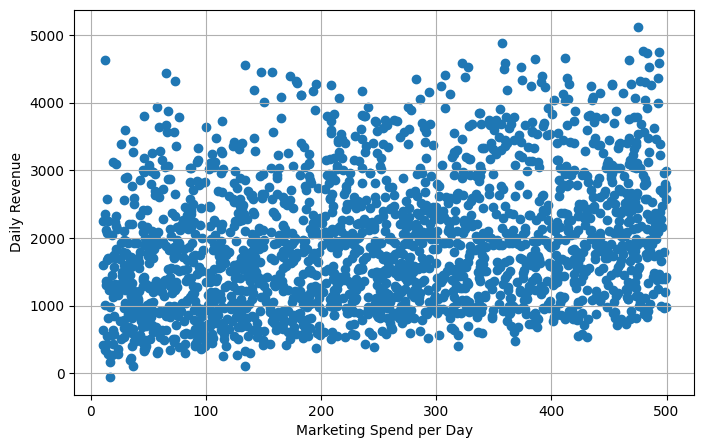

In [49]:
# Marketing Spend per Day / Daily Revenue

plt.figure(figsize=(8, 5))  # Figure

plt.scatter(data["Marketing_Spend_Per_Day"], data["Daily_Revenue"])  # Scatter plot

plt.xlabel("Marketing Spend per Day")
plt.ylabel("Daily Revenue")
plt.grid()
plt.show()

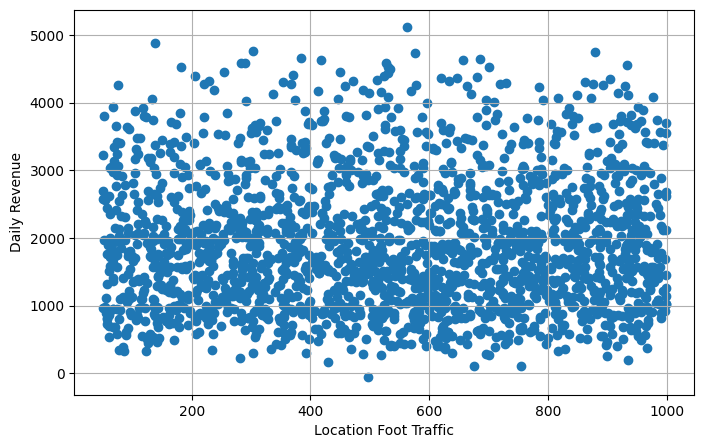

In [31]:
# Location Foot Traffic / Daily Revenue

plt.figure(figsize=(8, 5))  # Figure

plt.scatter(data["Location_Foot_Traffic"], data["Daily_Revenue"])  # Scatter plot

plt.xlabel("Location Foot Traffic")
plt.ylabel("Daily Revenue")
plt.grid()
plt.show()

<h2 id="features-target">Split Data into features (X) and target (y)</h2>

In [50]:
X = data[['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic']].values

X[:5]

array([[152.  ,   6.74,  14.  ,   4.  , 106.62,  97.  ],
       [485.  ,   4.5 ,  12.  ,   8.  ,  57.83, 744.  ],
       [398.  ,   9.09,   6.  ,   6.  ,  91.76, 636.  ],
       [320.  ,   8.48,  17.  ,   4.  , 462.63, 770.  ],
       [156.  ,   7.44,  17.  ,   2.  , 412.52, 232.  ]])

In [51]:
y = data["Daily_Revenue"]

y[:5]

0    1547.81
1    2084.68
2    3118.39
3    2912.20
4    1663.42
Name: Daily_Revenue, dtype: float64

<h2 id="preprocessing">Preprocessing</h2>

In [52]:
# Standard Scaler

scaler_X = StandardScaler().fit_transform(X)

<h2 id="train-test">Split into Train/Test sets</h2>

In [53]:
train_X, test_X, train_y, test_y = train_test_split(scaler_X, y, test_size=0.2, random_state=4)

print("Train Size: ", train_X.size, "Test Size: ", test_X.size)

Train Size:  9600 Test Size:  2400


<h2 id="training-model">Training Model</h2>

After preprocessing the data, we train a regression model using the training set. The model learns the relationships between the input features and daily revenue to make accurate predictions on new data.

In [55]:
model = LinearRegression().fit(train_X, train_y)
model

LinearRegression()

<h2 id="evaluation-model">Evaluation Model</h2>

We evaluate the model’s performance using the R² score, which measures how well the predicted values match the actual revenue. A higher R² indicates better model accuracy.

In [59]:
predict_y = model.predict(test_X)

r2 = r2_score(test_y, predict_y)
r2

0.8826792239083723

<h2 id="conclusion">Conclusion</h2>

In this project, we developed a regression model to predict daily revenue for a coffee shop using key operational features. The model showed promising results in capturing the main factors affecting revenue.